#### necessary packages

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import cartopy
import dask
from tqdm.autonotebook import tqdm  # Fancy progress bars for our loops!
import intake
import fsspec
import requests
import aiohttp
import nc_time_axis

#### this is the dataset we want to use

In [12]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


#### the following is basically the same as the previous one, but offers a convenient way to see the number of possible values of each column

In [13]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


#### we usually use the df.query to filter the data we want

In [36]:
# df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2' & variable_id == 'tas'  & institution_id == 'NCAR'")
df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'tas' & institution_id == 'NCAR' & experiment_id == 'historical'")

# df_ta_ncar.experiment_id.unique()
df_ta_ncar


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
53470,CMIP,NCAR,CESM2,amip,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r1i1p1f1...,NaN,20190218
55166,CMIP,NCAR,CESM2,amip,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r3i1p1f1...,NaN,20190220
55264,CMIP,NCAR,CESM2,amip,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r2i1p1f1...,NaN,20190220
59875,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61655,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
61862,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
62691,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
63131,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
63266,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
64615,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311


In [29]:

"""
Another way to do this:
query = dict(
    experiment_id=['abrupt-4xCO2','piControl'], # pick the `abrupt-4xCO2` and `piControl` forcing experiments
    table_id='Amon',                            # choose to look at atmospheric variables (A) saved at monthly resolution (mon)
    variable_id=['tas', 'rsut','rsdt','rlut'],  # choose to look at near-surface air temperature (tas) as our variable
    member_id = 'r1i1p1f1',                     # arbitrarily pick one realization for each model (i.e. just one set of initial conditions)
)

col_subset = col.search(require_all_on=["source_id"], **query)
col_subset.df.groupby("source_id")[
    ["experiment_id", "variable_id", "table_id"]
].nunique()
"""

'\nAnother way to do this:\nquery = dict(\n    experiment_id=[\'abrupt-4xCO2\',\'piControl\'], # pick the `abrupt-4xCO2` and `piControl` forcing experiments\n    table_id=\'Amon\',                            # choose to look at atmospheric variables (A) saved at monthly resolution (mon)\n    variable_id=[\'tas\', \'rsut\',\'rsdt\',\'rlut\'],  # choose to look at near-surface air temperature (tas) as our variable\n    member_id = \'r1i1p1f1\',                     # arbitrarily pick one realization for each model (i.e. just one set of initial conditions)\n)\n\ncol_subset = col.search(require_all_on=["source_id"], **query)\ncol_subset.df.groupby("source_id")[\n    ["experiment_id", "variable_id", "table_id"]\n].nunique()\n'

#### Then we pick one dataset and open it with xarray.<br>
Xarray in my opinion is an upgraded version of pandas. For example, in the dataset below, we have longitude and latitude, and each of them has several values (in our case it is one), such as temperature, pressure, etc. If we are using pandas, we must use multi-indices, or store list in each entry. In comparison, xarray is much more organized. It firstly shows how we divided our coordinates, and then, if we want to see some specific values, just use .squeeze

In [24]:
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ta_ncar.zstore.values[-1]
print(zstore)

# create a mutable-mapping-style interface to the store
mapper = fsspec.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r11i1p1f1/Amon/tas/gn/v20190514/


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a...
    version_id:             v20190514

<Figure size 1200x600 with 0 Axes>

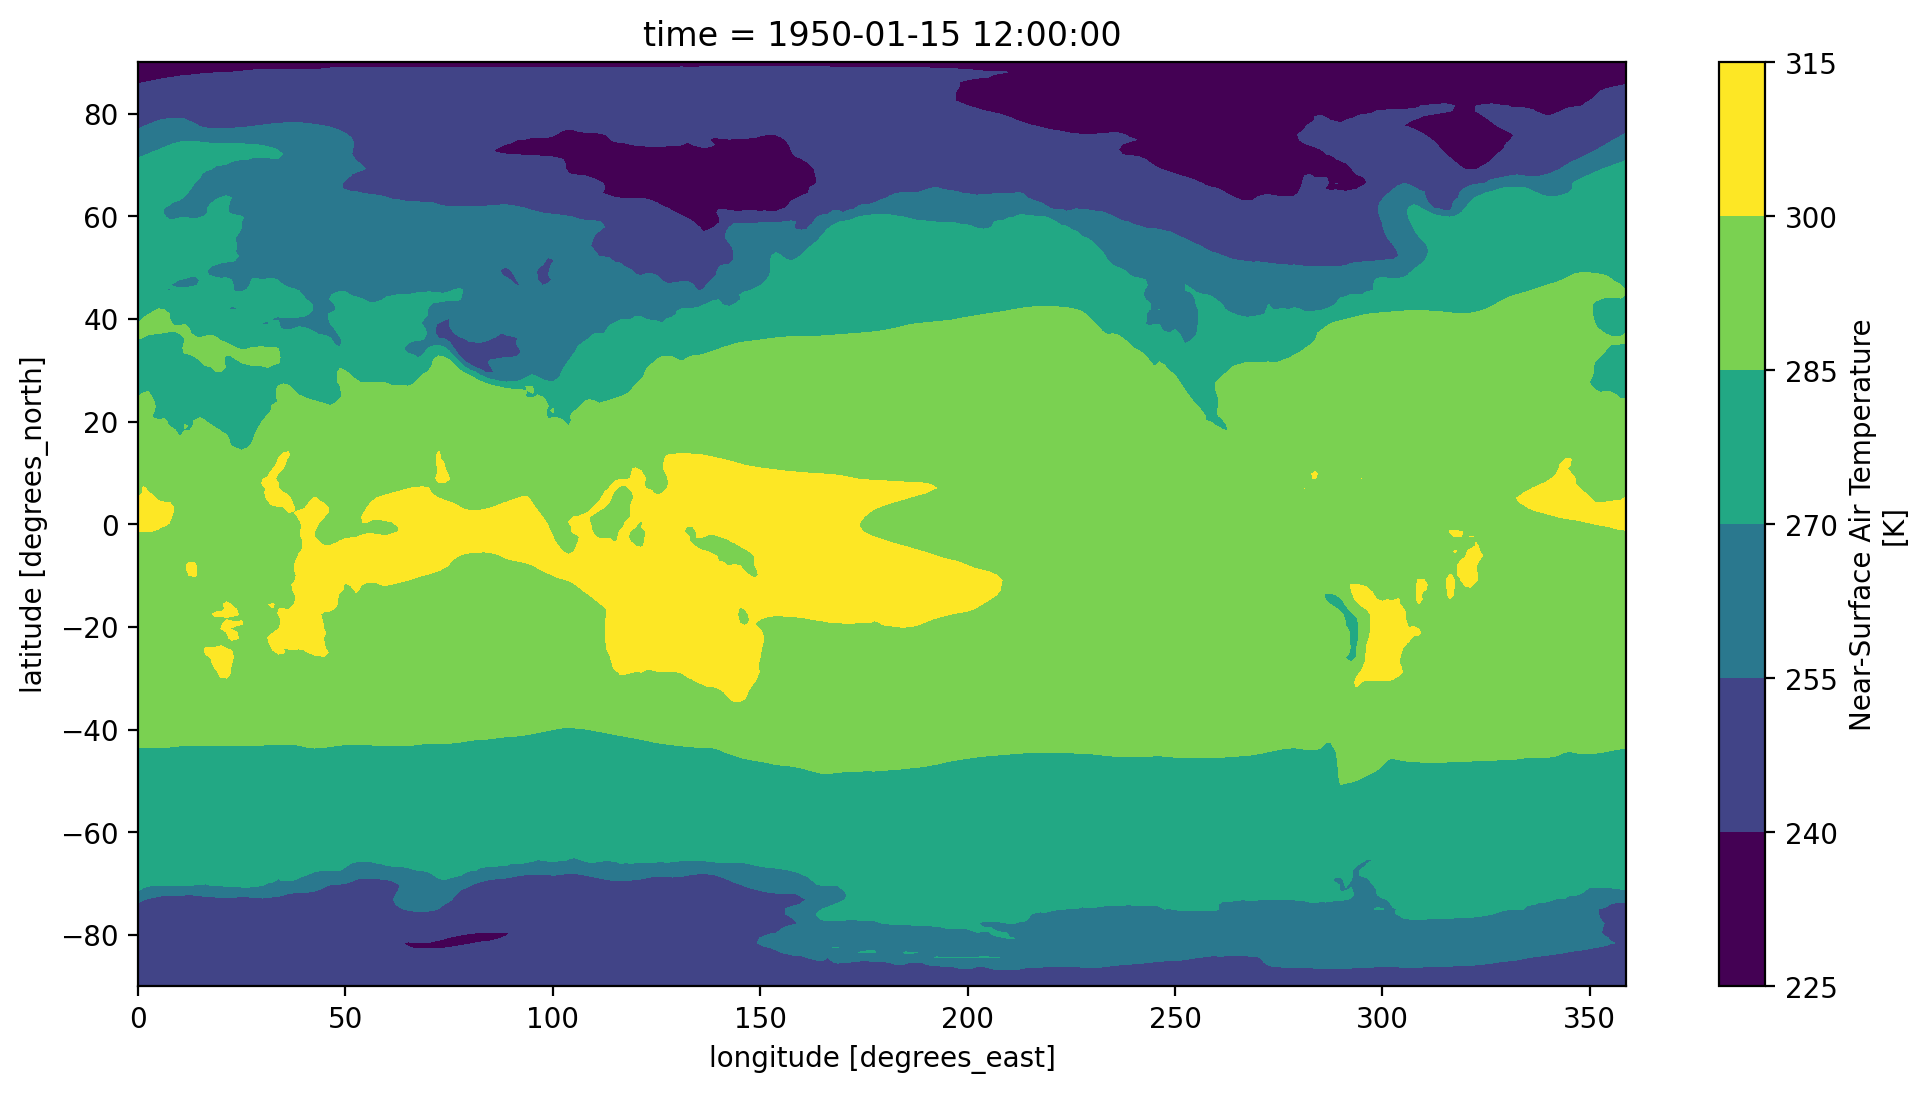

<Figure size 1200x600 with 0 Axes>

In [25]:
ds.tas.sel(time='1950-01').squeeze().plot.contourf()
plt.figure()



#### And xarray also has the built-in plot function, which is better than pandas, which I need to convert to numpy array first.<br>
And we do need to do some settings before plotting, as shown below

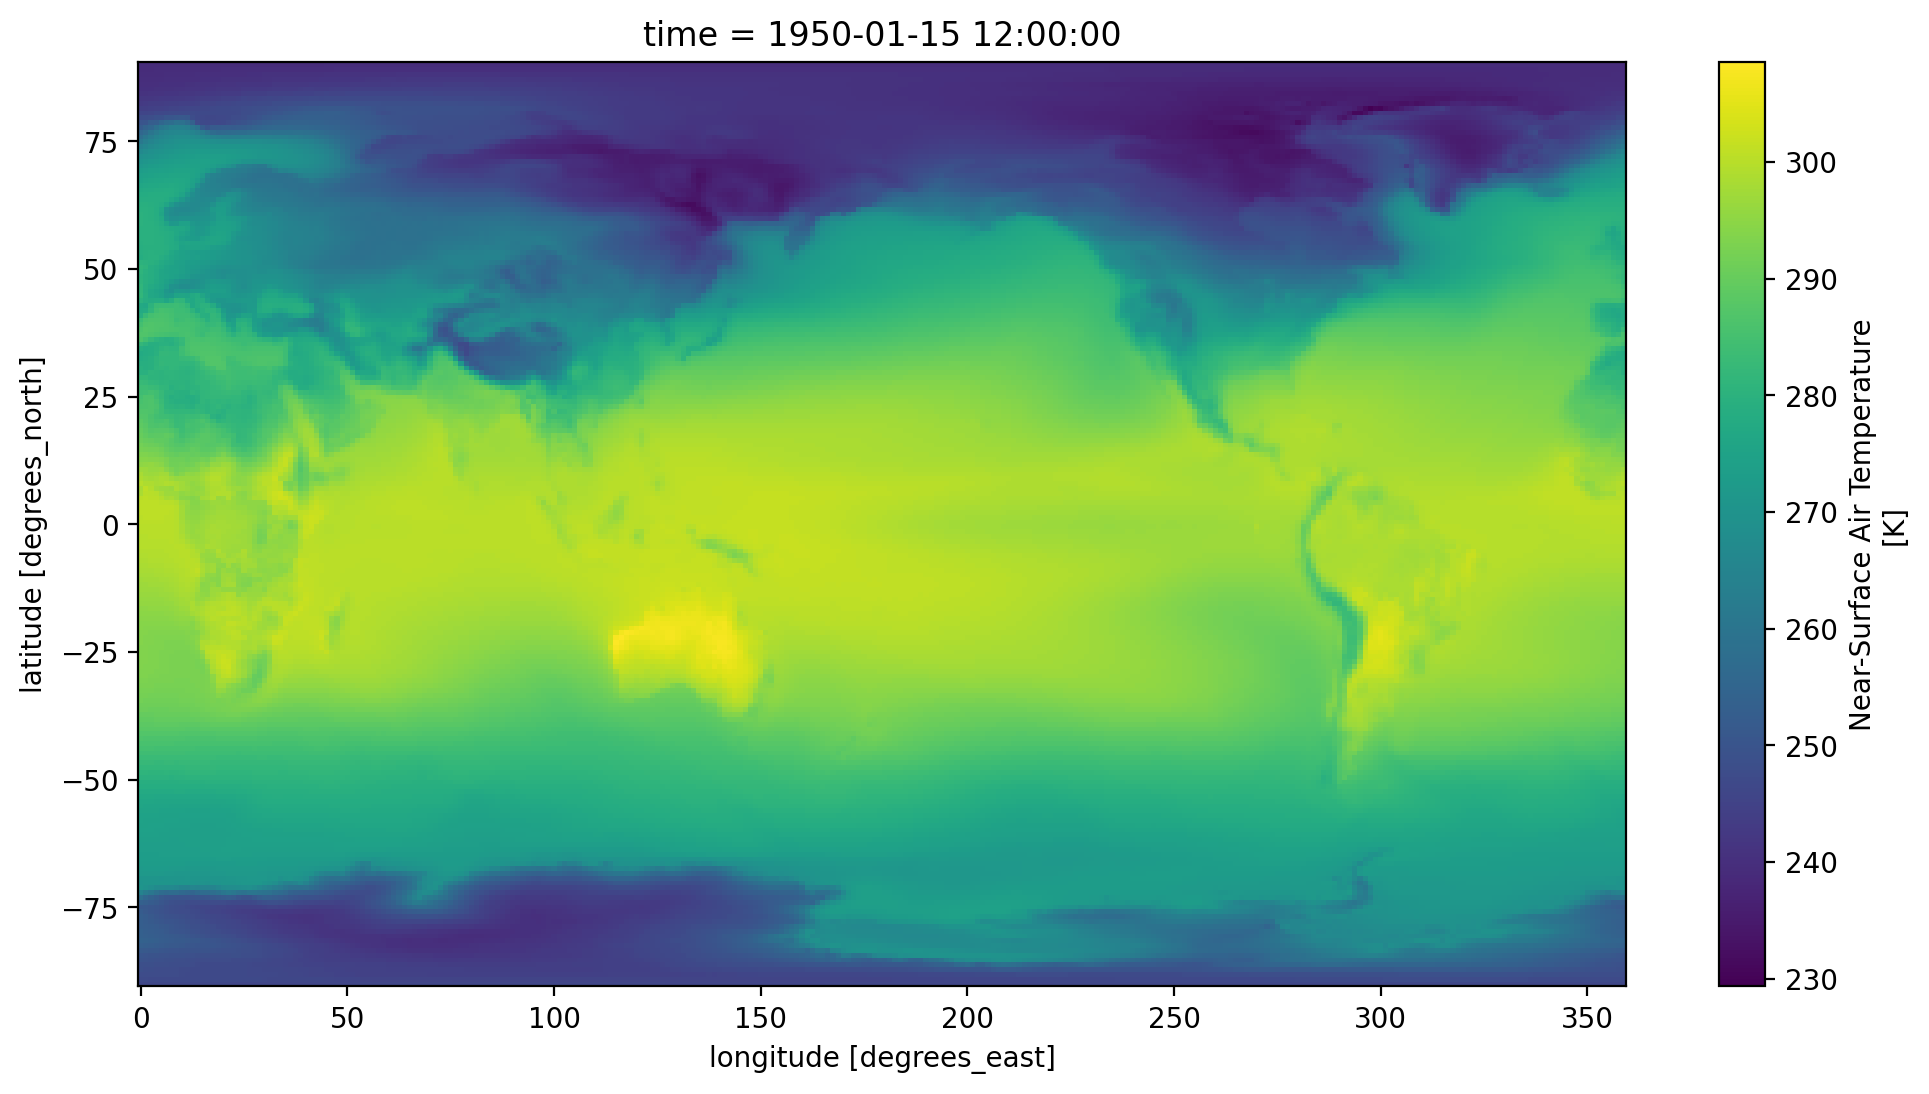

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
ds.tas.sel(time='1950-01').squeeze().plot()

1980 months, 96 latitude, 144 longitude.

In [27]:
ds.tas.shape

(1980, 192, 288)

#### So far so good, but I did find some problem with the sample script<br>
This is the area of earth, data provided by pangeo's big dataset


In [28]:
# areacella == Grid-Cell Area for Atmospheric Grid Variables
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2' & experiment_id =='historical'")
df_area

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
58638,CMIP,NCAR,CESM2,historical,r1i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61483,CMIP,NCAR,CESM2,historical,r5i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
61561,CMIP,NCAR,CESM2,historical,r4i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
61574,CMIP,NCAR,CESM2,historical,r3i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
61928,CMIP,NCAR,CESM2,historical,r6i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
63082,CMIP,NCAR,CESM2,historical,r2i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
64031,CMIP,NCAR,CESM2,historical,r7i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r7...,NaN,20190311
65388,CMIP,NCAR,CESM2,historical,r9i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r9...,NaN,20190311
65872,CMIP,NCAR,CESM2,historical,r8i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311
66386,CMIP,NCAR,CESM2,historical,r10i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190313


In [29]:

ds_area = xr.open_zarr(fsspec.get_mapper(df_area.zstore.values[-1]), consolidated=True)
ds_area

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    variable_id:            areacella
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/96455df2-979e-4cd4-8521-ddf307c6bc4a
    version_id:             v20190514

In [43]:
df_area.zstore.values[-1]

'gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp245/r11i1p1f1/fx/areacella/gn/v20200528/'

### The dimensions does not match, and I tries several ways to solve this problem.<br> 
The basic algorithm is that denote the temperature for each area as temp_i, each area to be area_i $$\frac{\sum_i temp_i * area_i}{\sum_i area_i}$$<br>
which is weighted average. However, the two datasets has different number of lat and lon divided

In [30]:
# print((ds.tas * ds_area.areacella).sel(time='1950-01').squeeze()[0,50].values)
# print(ds_area.areacella.squeeze()[0,50].values)
# print((ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']).sel(time='1950-01').squeeze().values)
# print(ds_area.areacella.sum(dim=['lon', 'lat']).squeeze().values)
# # 问题肯定出在求和上
# (ds.tas * ds_area.areacella).sel(time='1950-01').squeeze()
# # ds_area.areacella.squeeze()

### Thus I tried to use another algorithm.<br>
### Firstly, I directly multipy temperatre and area component-wisely, and then take sum. Then divide them by the number of entries. (for example, if temp * area resulted in m*n matrix, then I take the sum of the entries and then divide it by mn)
### Then do the same thing to area

In [31]:
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])
ta_timeseries = (ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
# temp_avg = (ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / ((ds.tas * ds_area.areacella).shape[-1] * (ds.tas * ds_area.areacella).shape[-2])
# area_avg = ds_area.areacella.sum(dim=['lon', 'lat']) / (ds_area.areacella.shape[-1] * ds_area.areacella.shape[-2])
# ta_timeseries = temp_avg / area_avg
ta_timeseries

<xarray.DataArray (time: 1980)>
dask.array<truediv, shape=(1980,), dtype=float32, chunksize=(600,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

In [32]:
%time ta_timeseries.load()

CPU times: user 1.22 s, sys: 546 ms, total: 1.76 s
Wall time: 6.27 s


<xarray.DataArray (time: 1980)>
array([285.3431 , 285.51422, 286.22678, ..., 288.4625 , 287.72174,
       287.05515], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

In [39]:
# ta_timeseries['time'][0]
# ta_timeseries['time'] = ta_timeseries.indexes['time'].to_datetimeindex()
# ta_timeseries['time'][0]

Text(0.5, 1.0, 'Global Mean Surface Air Temperature')

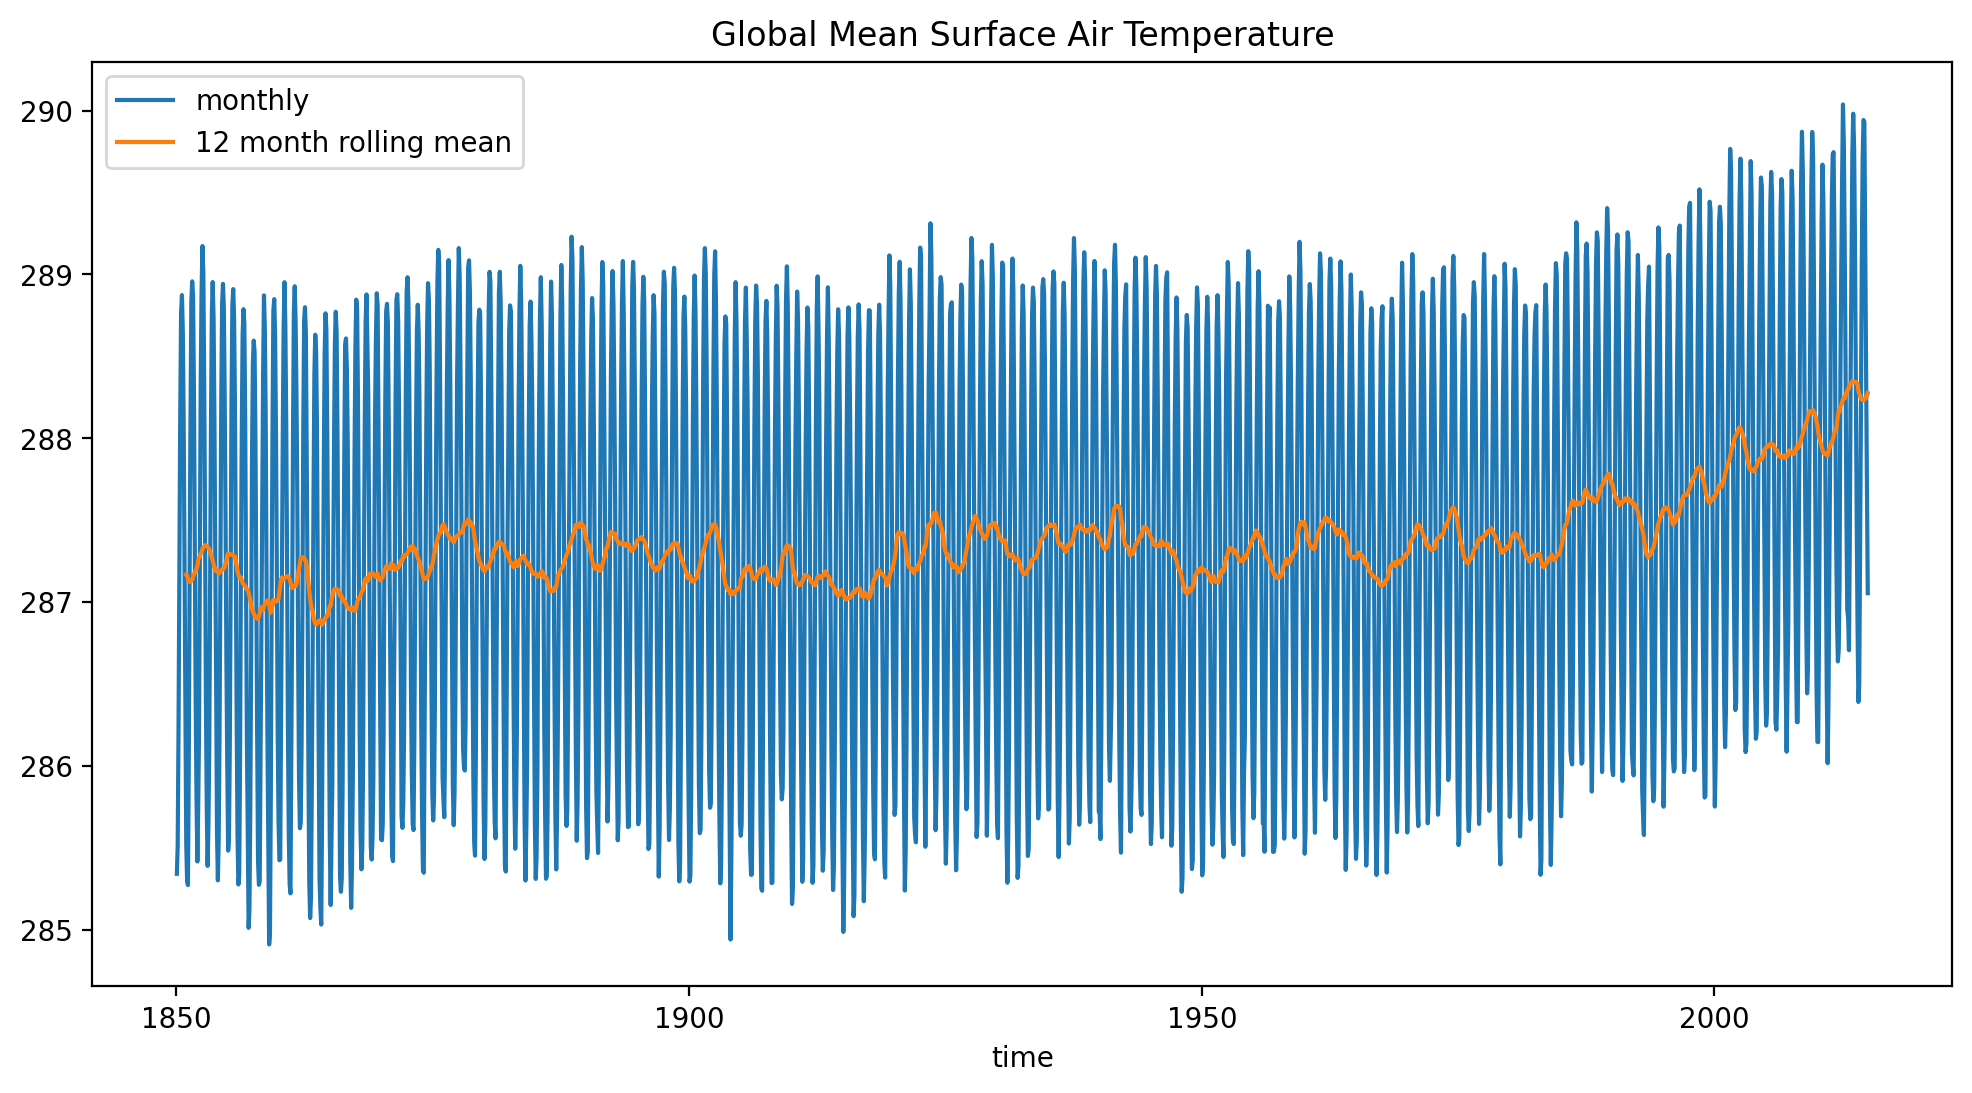

In [35]:

# ta_timeseries[:100].plot(label='monthly')
# ta_timeseries[:100].rolling(time=12).mean().plot(label='12 month rolling mean')
ta_timeseries.plot(label='monthly')
ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature')